In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import unicodedata

In [4]:
base_path = Path("/home/steven-laptop/Documentos/Estudio/Proyecto QAIR/air_quality/BELLEZA")

In [68]:
# Nombre de tu archivo
filename = "participacion_empresas_clean.csv"

# Construye la ruta completa
file_path = base_path / filename

# Léelo con pandas
df = pd.read_csv(file_path)

In [ ]:
palette = ["#F4C2C2", "#B76E79", "#B57EDC", "#b4dec7", "#aaa396"]
arr_colors = {
    "Colgate-Palmolive Co": "#F20505",
    "L'Oréal Groupe": "#B76E79",
    "Others": "#B57EDC",
    "Procter & Gamble Co, The":"#b4dec7",
    "Haleon Plc": "#585C5F",
    "Kenvue Inc": "#3D50BD",
    "Beiersdorf AG": "#5C1909",
    "Natura&Co": "#E6A8D7",
    "Unilever Group": "#DBB637",
    "Grupo Boticário": "#37BDBF"
}


In [61]:
# Función para normalizar nombres de columnas
def normalize(col):
    col2 = col.strip().replace(' ', '_')
    col2 = unicodedata.normalize('NFKD', col2)
    return ''.join(ch for ch in col2 if not unicodedata.combining(ch)).lower()

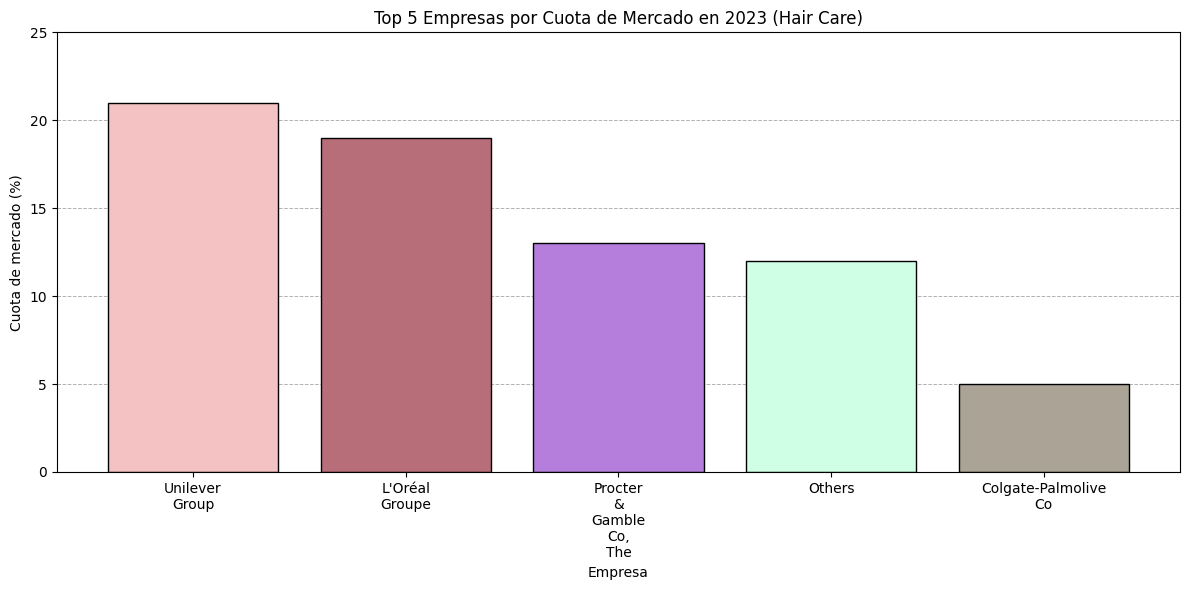

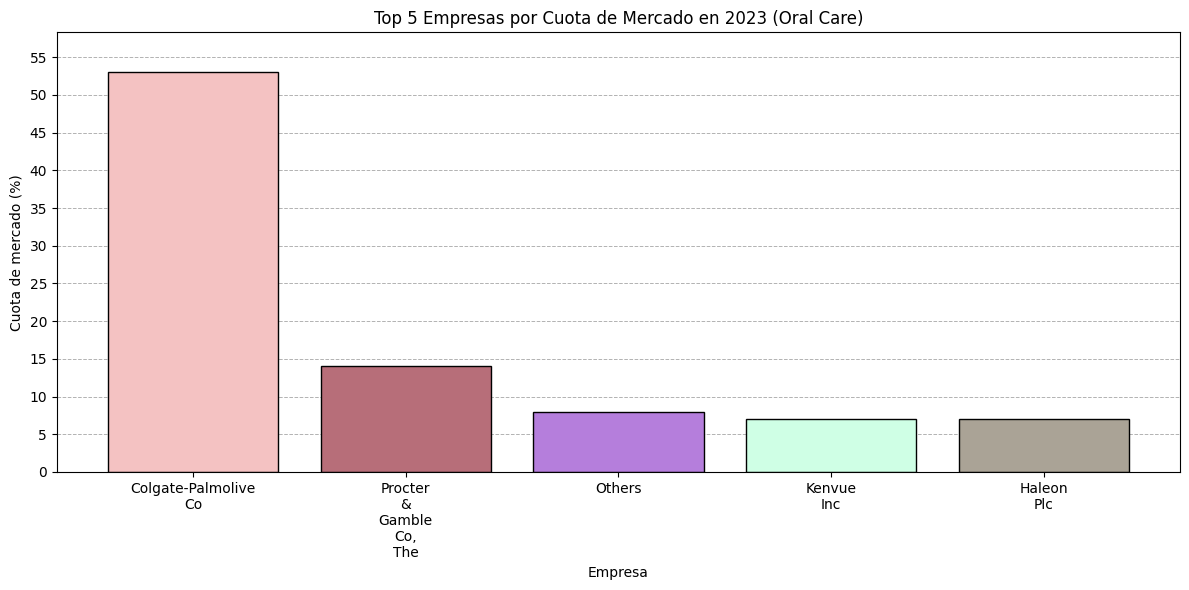

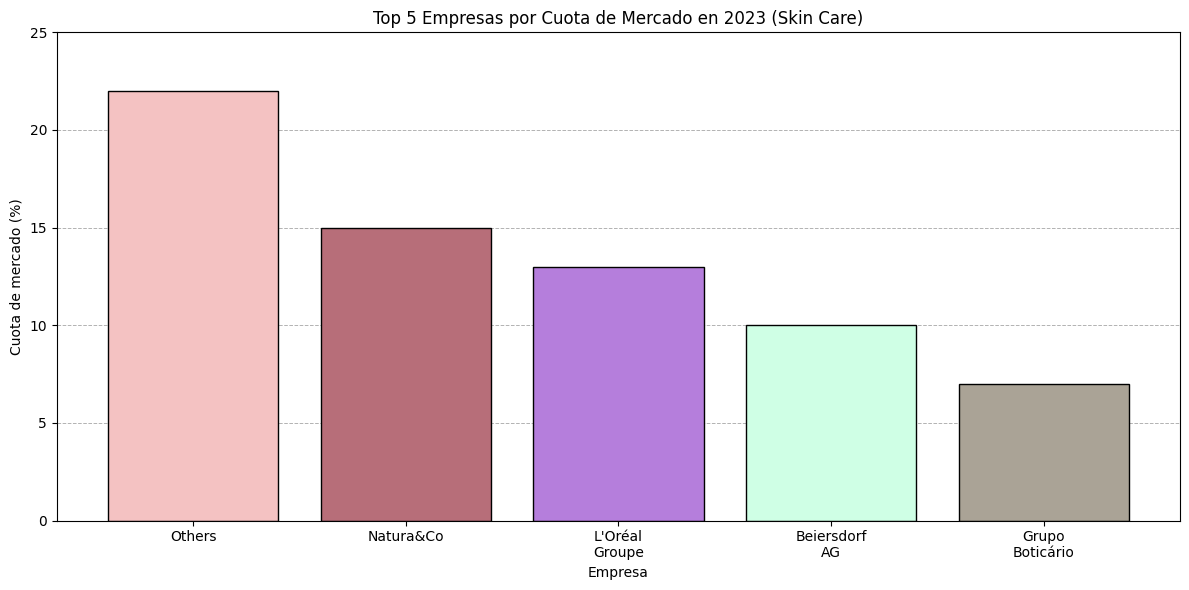

In [78]:
# Filtrar solo el año 2023
df_2023 = df[df['year'] == 2023]

# Generar gráfico de barras Top 5 Empresas por categoría
categories = df_2023['category'].unique()

for category in categories:
    df_cat = df_2023[df_2023['category'] == category]
    top5  = df_cat.nlargest(5, 'companies_value')
    
    # Prepara etiquetas multilínea
    labels = ["\n".join(name.split()) for name in top5['company_name']]
    colors = palette[:len(top5)]
    
    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Dibujar barras
    bars = ax.bar(
        labels,
        top5['companies_value'],
        color=colors,
        edgecolor='black',
        linewidth=1
    )
    
    # Líneas de guía horizontales detrás de las barras
    ax.set_axisbelow(True)
    ax.yaxis.grid(
        True,
        linestyle='--',
        linewidth=0.7,
        color='gray',
        alpha=0.6
    )
    
    # Ajustar ticks para alinear las líneas de guía
    max_val = top5['companies_value'].max()
    ax.set_ylim(0, max_val * 1.1)
    ax.set_yticks(np.arange(0, max_val + 5, 5))
    
    
    
    # Etiquetas y título
    ax.set_xlabel('Empresa')
    ax.set_ylabel('Cuota de mercado (%)')
    ax.set_title(f'Top 5 Empresas por Cuota de Mercado en 2023 ({category})')
    ax.tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()


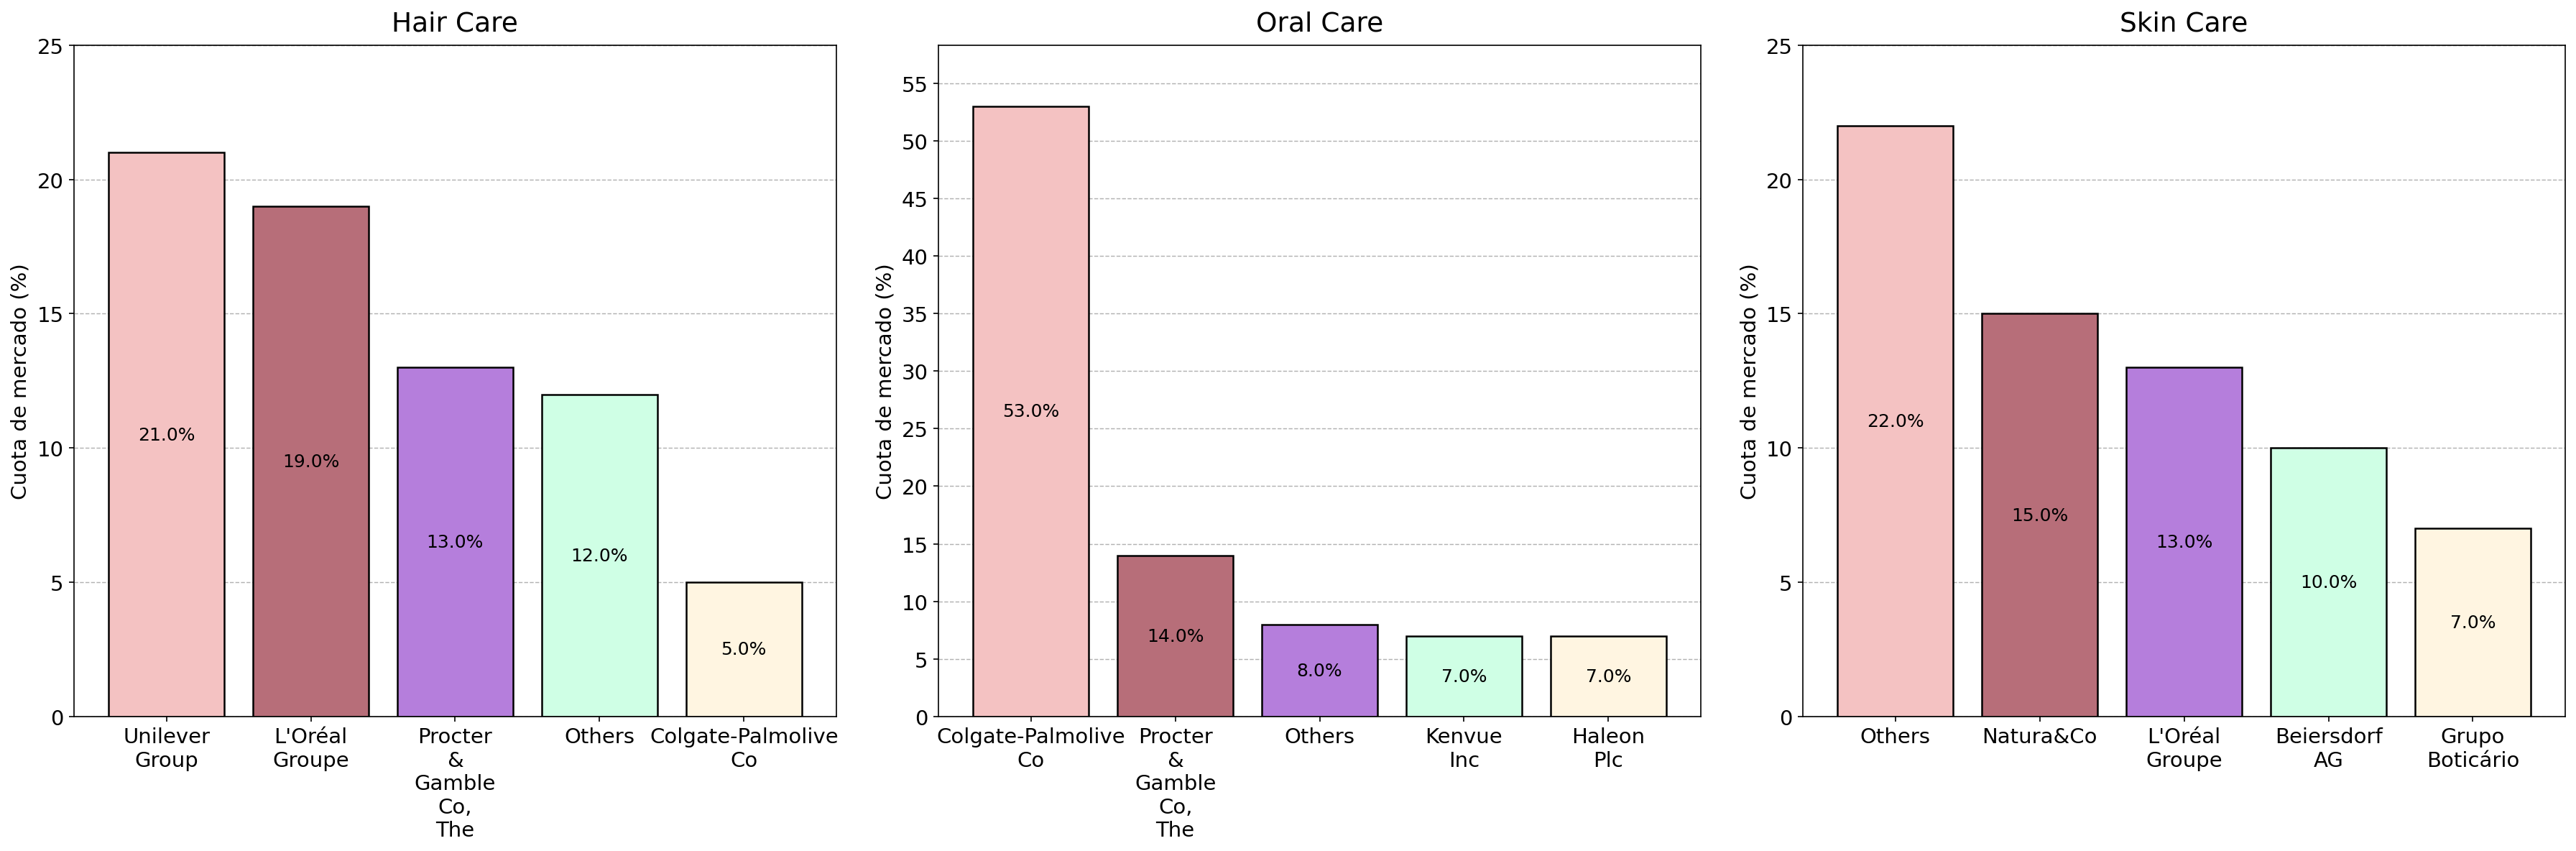

In [ ]:
# Filtrar solo el año 2023
df_2023 = df[df['year'] == 2023]

# Categorías a graficar
categories = ['Hair Care', 'Oral Care', 'Skin Care']

# Crear figura con tres subplots horizontalmente
fig, axes = plt.subplots(1, 3, figsize=(24, 8), dpi=150)

for ax, category in zip(axes, categories):
    df_cat = df_2023[df_2023['category'] == category]
    top5 = df_cat.nlargest(5, 'companies_value')
    
    # Etiquetas multilínea para nombres largos
    labels = ["\n".join(name.split()) for name in top5['company_name']]
    colors = palette[:len(top5)]
    
    # Dibujar barras
    bars = ax.bar(
        labels,
        top5['companies_value'],
        color=colors,
        edgecolor='black',
        linewidth=1.2
    )
    
    # Líneas de guía horizontales
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray', alpha=0.6)
    
    # Ajustar límites y ticks
    max_val = top5['companies_value'].max()
    ax.set_ylim(0, max_val * 1.1)
    ax.set_yticks(np.arange(0, max_val + 5, 5))
    
    # Etiqueta de porcentaje en el centro de cada barra
    for bar in bars:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            h / 2,
            f"{h:.1f}%",
            ha='center', va='center',
            fontsize=12,
            color='black'
        )
    
    # Configuración de ejes y título
    ax.set_title(f'{category}', fontsize=18, pad=10)
    #ax.set_xlabel('Empresa', fontsize=14)
    ax.set_ylabel('Cuota de mercado (%)', fontsize=14)
    ax.tick_params(axis='x', rotation=0, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Ajustes finales
#fig.suptitle('Top 5 Empresas por Cuota de Mercado en 2023 por Categoría', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


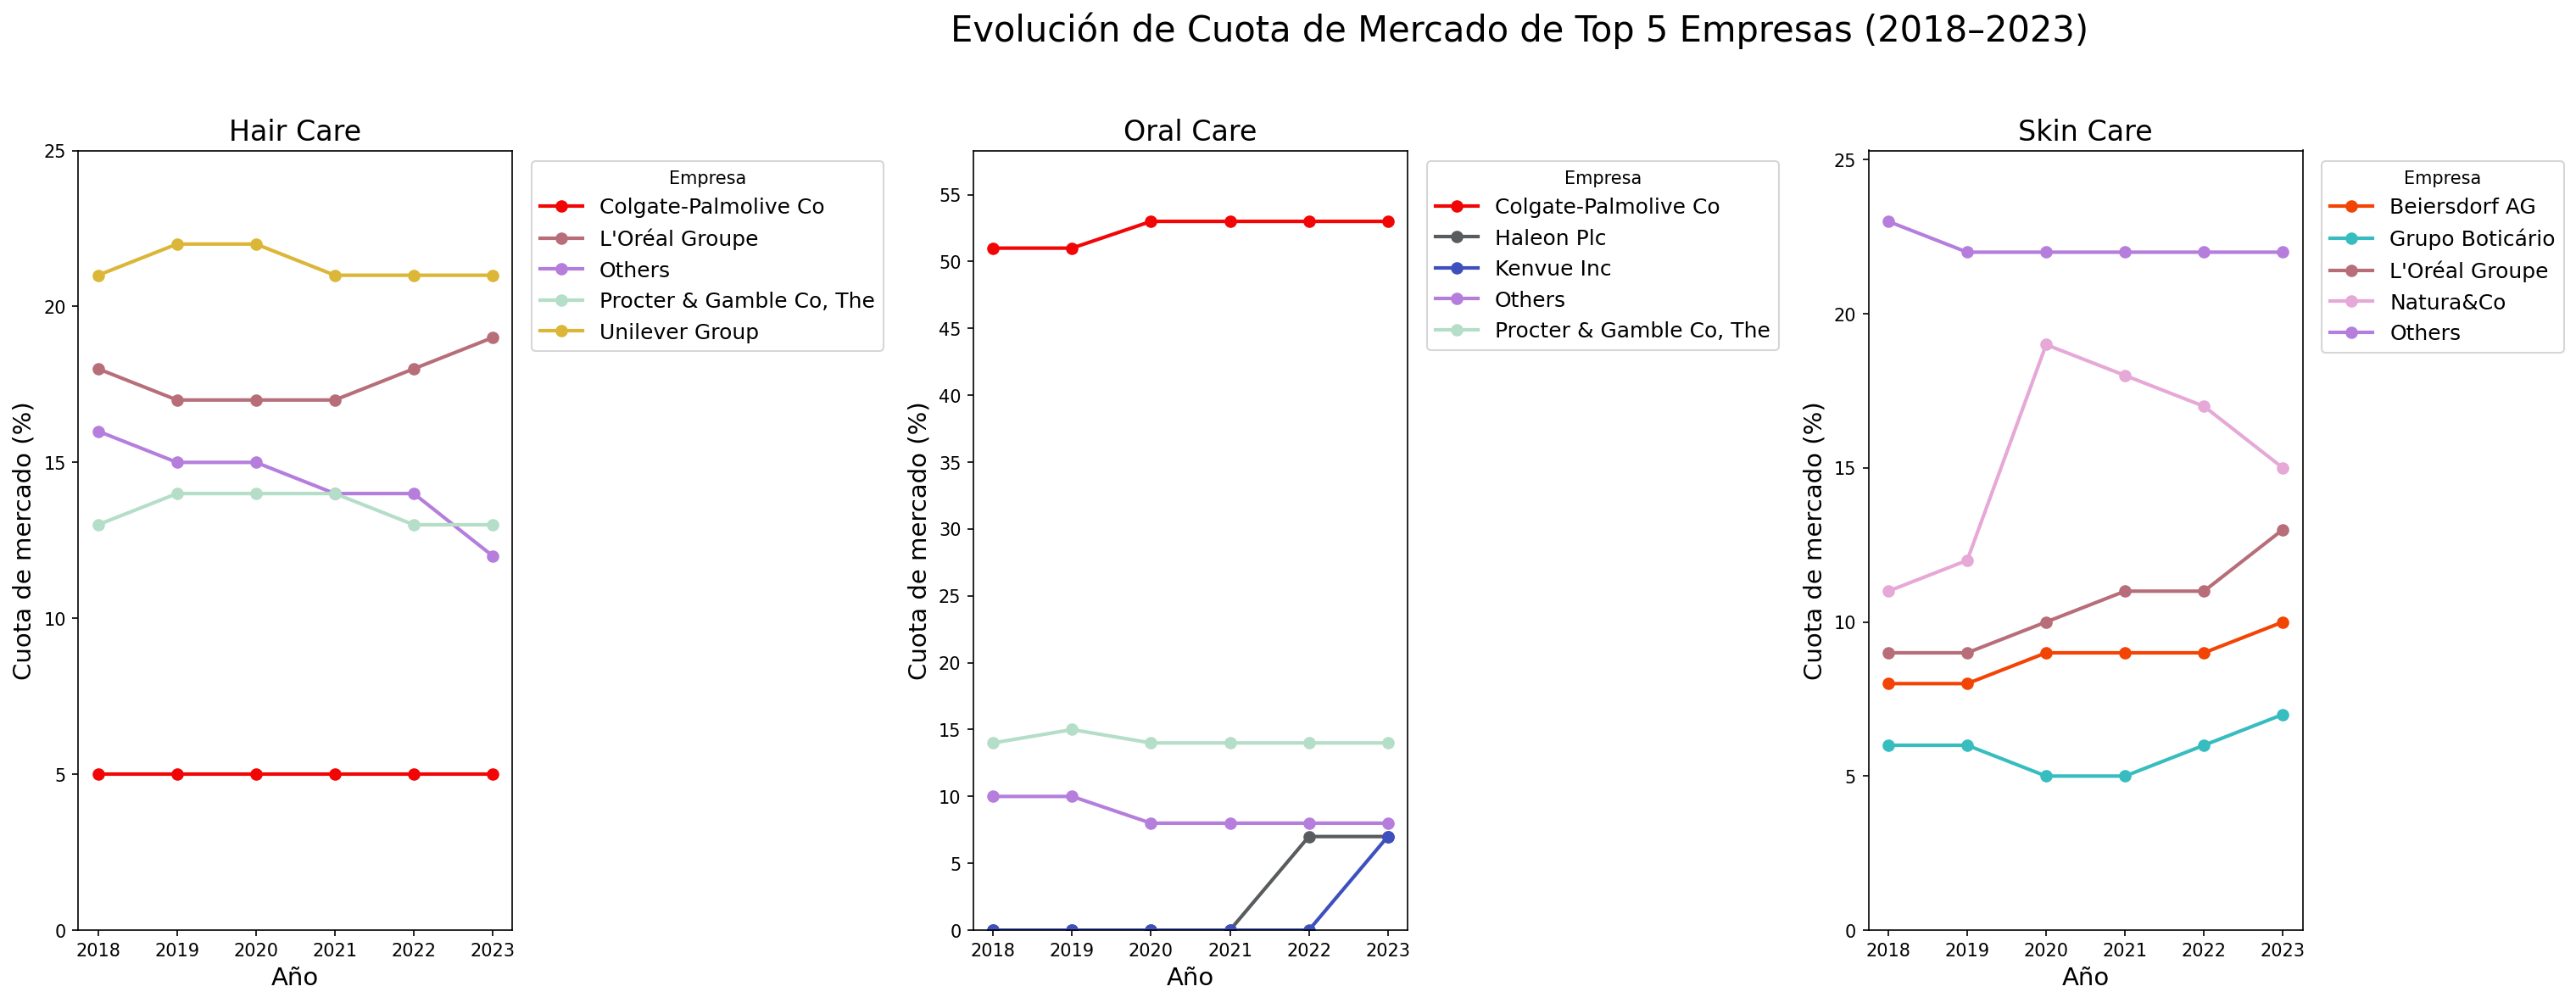

In [120]:
# Años y categorías
years = list(range(2018, 2024))
categories = ['Hair Care', 'Oral Care', 'Skin Care']

# Crear figura con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8), dpi=150)

for ax, category in zip(axes, categories):
    # Filtrar categoría
    df_cat = df[df['category'] == category]
    # Top 5 empresas en 2023
    top5 = df_cat[df_cat['year'] == 2023].nlargest(5, 'companies_value')['company_name']
    # Datos de tendencia 2018–2023 para esas empresas
    df_trend = df_cat[df_cat['company_name'].isin(top5)]
    pivot = df_trend.pivot(index='year', columns='company_name', values='companies_value')
    
    # Graficar líneas para cada empresa
    for i, company in enumerate(pivot.columns):
        ax.plot(
            pivot.index, 
            pivot[company], 
            marker='o', 
            linewidth=2, 
            label=company, 
            color=arr_colors[company]
        )
    
    # Configuración de ejes y grid
    ax.set_title(f'{category}', fontsize=16)
    ax.set_xlabel('Año', fontsize=14)
    ax.set_ylabel('Cuota de mercado (%)', fontsize=14)
    ax.set_xticks(years)
    ax.set_ylim(0, pivot.max().max() * 1.1)
    ax.set_yticks(np.arange(0, pivot.max().max() + 5, 5))
    
    ax.legend(
        title='Empresa',
        fontsize=12,
        loc='upper left',
        bbox_to_anchor=(1.02, 1)  # en el margen derecho
    )

# Título general y ajuste
fig.suptitle('Evolución de Cuota de Mercado de Top 5 Empresas (2018–2023)', fontsize=20)
plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()


In [96]:
arr_colors['Others']

'#B57EDC'